### 使用Sklearn构造逻辑斯蒂回归模型

In [4]:
from sklearn.linear_model import LogisticRegression
# random_state设置为0，每次shuffle后的结果都是一样的，便于调试
# C，正则强度
lr = LogisticRegression(C=1000.0, random_state=0)

### 读取数据

In [36]:
import pandas
import numpy as np 
dt = pandas.read_csv('ex2data1.txt',sep=',', header=0)
X = dt.iloc[:,0:2].values
Y = dt.iloc[:,2].values
print(X)

[[30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]
 [45.08327748 56.31637178]
 [61.10666454 96.51142588]
 [75.02474557 46.55401354]
 [76.0987867  87.42056972]
 [84.43281996 43.53339331]
 [95.86155507 38.22527806]
 [75.01365839 30.60326323]
 [82.30705337 76.4819633 ]
 [69.36458876 97.71869196]
 [39.53833914 76.03681085]
 [53.97105215 89.20735014]
 [69.07014406 52.74046973]
 [67.94685548 46.67857411]
 [70.66150955 92.92713789]
 [76.97878373 47.57596365]
 [67.37202755 42.83843832]
 [89.67677575 65.79936593]
 [50.53478829 48.85581153]
 [34.21206098 44.2095286 ]
 [77.92409145 68.97235999]
 [62.27101367 69.95445795]
 [80.19018075 44.82162893]
 [93.1143888  38.80067034]
 [61.83020602 50.25610789]
 [38.7858038  64.99568096]
 [61.37928945 72.80788731]
 [85.40451939 57.05198398]
 [52.10797973 63.12762377]
 [52.04540477 69.43286012]
 [40.23689374 71.16774802]
 [54.63510555 52.21388588]
 [33.91550011 98.86943574]
 [64.17698887 80.90806059]
 

### 训练模型

D:\Anaconda3\envs\pycharm\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


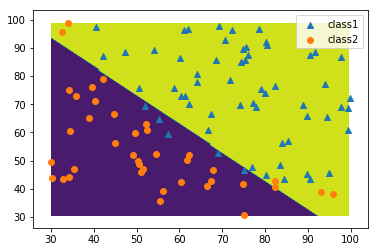

In [54]:
from matplotlib import pyplot as plt
lr.fit(X, Y)

# 构建源数据
interval = 0.5
x0_min, x0_max = X[:, 0].min(),X[:, 0].max()
x1_min, x1_max = X[:, 1].min(),X[:, 1].max()

xy, yx = np.meshgrid(np.arange(x0_min, x0_max, interval),
                    np.arange(x1_min, x1_max,interval))

z = np.array([xy.ravel(), yx.ravel()]).T

# 预测
z_predict = []
for _z in z:
    z_predict.append(lr.predict(_z.reshape(1,-1)))
    
z_predict = np.array(z_predict).reshape(xy.shape)
# 绘制结果
ax = plt.axes()
ax.contourf(xy, yx, z_predict)
# 绘制原始数据
ax.scatter(X[Y == 1,0], X[Y == 1,1], marker='^', label='class1')
ax.scatter(X[Y == 0,0], X[Y == 0,1], marker='o', label='class2')
ax.legend()